# Pokemon Team Builder

### Goal

Figure out which 6 Normal type pokemon to choose

### Steps

- find some pokemon data
    - data should include generations, types, moves, base stats etc.
- find the "strongest" Normal type pokemon (whatever strong means in this context) **specifically for Gen 3** (FireRed/LeafGreen)

### Data

Pokemon data courtesy of Tidy Tuesday: https://github.com/rfordatascience/tidytuesday/tree/main/data/2025/2025-04-01

In [3]:
import pandas as pd

In [4]:
pokemon = pd.read_csv("./data/pokemon_df.csv")
print(pokemon.shape)
pokemon.head()

(949, 22)


,id,pokemon,species_id,height,weight,base_experience,type_1,type_2,hp,attack,...,special_defense,speed,color_1,color_2,color_f,egg_group_1,egg_group_2,url_icon,generation_id,url_image
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,...,65,45,#78C850,#A040A0,#81A763,monster,plant,//archives.bulbagarden.net/media/upload/7/7b/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
1,2,ivysaur,2,1.0,13.0,142,grass,poison,60,62,...,80,60,#78C850,#A040A0,#81A763,monster,plant,//archives.bulbagarden.net/media/upload/a/a0/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
2,3,venusaur,3,2.0,100.0,236,grass,poison,80,82,...,100,80,#78C850,#A040A0,#81A763,monster,plant,//archives.bulbagarden.net/media/upload/0/07/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
3,4,charmander,4,0.6,8.5,62,fire,NaN,39,52,...,50,65,#F08030,NaN,NaN,monster,dragon,//archives.bulbagarden.net/media/upload/7/7d/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
4,5,charmeleon,5,1.1,19.0,142,fire,NaN,58,64,...,65,80,#F08030,NaN,NaN,monster,dragon,//archives.bulbagarden.net/media/upload/b/be/0...,1.0,https://raw.githubusercontent.com/HybridShivam...


### Data questions

- is this one row per pokemon or one row per pokemon + generation it's in (i.e. pokemon available in multiple games appear multiple times)?

If pokemon were unique, "species ID" would appear once each

In [6]:
print("Number of rows:", len(pokemon))
print("Unique IDs:", pokemon["species_id"].nunique())
print("Unique Species IDs:", pokemon["species_id"].nunique())

Number of rows: 949
Unique IDs: 802
Unique Species IDs: 802


There are both duplicate "ID"s *and* duplicate species IDs - are they the same?

Are there cases where ID does not equal Species ID?

In [7]:
pokemon[pokemon["id"] != pokemon["species_id"]]

,id,pokemon,species_id,height,weight,base_experience,type_1,type_2,hp,attack,...,special_defense,speed,color_1,color_2,color_f,egg_group_1,egg_group_2,url_icon,generation_id,url_image
802,10001,deoxys-attack,386,1.7,60.8,270,psychic,NaN,50,180,...,20,150,#F85888,NaN,NaN,no-eggs,NaN,NaN,NaN,https://raw.githubusercontent.com/HybridShivam...
803,10002,deoxys-defense,386,1.7,60.8,270,psychic,NaN,50,70,...,160,90,#F85888,NaN,NaN,no-eggs,NaN,NaN,NaN,https://raw.githubusercontent.com/HybridShivam...
804,10003,deoxys-speed,386,1.7,60.8,270,psychic,NaN,50,95,...,90,180,#F85888,NaN,NaN,no-eggs,NaN,NaN,NaN,https://raw.githubusercontent.com/HybridShivam...
805,10004,wormadam-sandy,413,0.5,6.5,148,bug,ground,60,79,...,85,36,#A8B820,#E0C068,#B5B931,bug,NaN,NaN,NaN,https://raw.githubusercontent.com/HybridShivam...
806,10005,wormadam-trash,413,0.5,6.5,148,bug,steel,60,69,...,95,36,#A8B820,#B8B8D0,#ABB84A,bug,NaN,NaN,NaN,https://raw.githubusercontent.com/HybridShivam...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,10143,mimikyu-busted,778,0.2,0.7,167,ghost,fairy,55,90,...,105,96,#705898,#EE99AC,#8E679C,indeterminate,NaN,NaN,NaN,https://raw.githubusercontent.com/HybridShivam...
945,10144,mimikyu-totem-disguised,778,0.4,2.8,167,ghost,fairy,55,90,...,105,96,#705898,#EE99AC,#8E679C,indeterminate,NaN,NaN,NaN,https://raw.githubusercontent.com/HybridShivam...
946,10145,mimikyu-totem-busted,778,0.4,2.8,167,ghost,fairy,55,90,...,105,96,#705898,#EE99AC,#8E679C,indeterminate,NaN,NaN,NaN,https://raw.githubusercontent.com/HybridShivam...
947,10146,kommo-o-totem,784,2.4,207.5,270,dragon,fighting,75,110,...,105,85,#7038F8,#C03028,#8336C5,dragon,NaN,NaN,NaN,https://raw.githubusercontent.com/HybridShivam...


There's some weird stuff in here...

Let's see generations so we can maybe filter down to Gen 3 early

In [9]:
pokemon["generation_id"].value_counts().sort_index()

generation_id
1.0    151
2.0    100
3.0    135
4.0    107
5.0    156
6.0     72
7.0     81
Name: count, dtype: int64

This looks like **new** pokemons per generation, so a pokemon that existed in Gen 1 but is also available in Ruby/Sapphire/Emerald (Gen 3) is tagged Gen 1 here.

We can see this by looking at some gen 3 pokemon, which start with the starters for Ruby/Sapphire/Emerald

In [11]:
pokemon[pokemon["generation_id"] == 3].head()

,id,pokemon,species_id,height,weight,base_experience,type_1,type_2,hp,attack,...,special_defense,speed,color_1,color_2,color_f,egg_group_1,egg_group_2,url_icon,generation_id,url_image
251,252,treecko,252,0.5,5.0,62,grass,NaN,40,45,...,55,70,#78C850,NaN,NaN,monster,dragon,//archives.bulbagarden.net/media/upload/2/2e/2...,3.0,https://raw.githubusercontent.com/HybridShivam...
252,253,grovyle,253,0.9,21.6,142,grass,NaN,50,65,...,65,95,#78C850,NaN,NaN,monster,dragon,//archives.bulbagarden.net/media/upload/b/b7/2...,3.0,https://raw.githubusercontent.com/HybridShivam...
253,254,sceptile,254,1.7,52.2,239,grass,NaN,70,85,...,85,120,#78C850,NaN,NaN,monster,dragon,//archives.bulbagarden.net/media/upload/e/e2/2...,3.0,https://raw.githubusercontent.com/HybridShivam...
254,255,torchic,255,0.4,2.5,62,fire,NaN,45,60,...,50,45,#F08030,NaN,NaN,ground,NaN,//archives.bulbagarden.net/media/upload/4/41/2...,3.0,https://raw.githubusercontent.com/HybridShivam...
255,256,combusken,256,0.9,19.5,142,fire,fighting,60,85,...,60,55,#F08030,#C03028,#E46C2E,ground,NaN,//archives.bulbagarden.net/media/upload/6/6e/2...,3.0,https://raw.githubusercontent.com/HybridShivam...


This leads onto the next question...

- are pokemon stats consistent across generations?

If we filter Gen 1 pokemon, do we get stats that are correct for the games FireRed/LeafGreen (which are considered Gen 3 in some places)

Let's take Zubat as an example. Here are its stats for "Gen 3" (from https://www.serebii.net/pokedex/041.shtml)

| HP | Attack | Defense | Sp. Attack | Sp. Defense | Speed |
|----|--------|---------|------------|-------------|-------|
| 40 | 45     | 35      | 30         | 40          | 55    |

and Gen 1:

| HP | Attack | Defense | Special | Speed | Speed |
|----|--------|---------|---------|-------|-------|
| 40 | 45     | 35      | 40      | 55    | 55    |

They look the same **apart from Special** (which looks like it was a single stat in Gen 1 but is now split into attack/defense)

Let's see if our dataset matches the data

In [13]:
pokemon[pokemon["pokemon"] == "zubat"].transpose()

,40
id,41
pokemon,zubat
species_id,41
height,0.8
weight,7.5
base_experience,49
type_1,poison
type_2,flying
hp,40
attack,45


Looks good!

We will then assume the stats are **correct** for FireRed/LeafGreen

It would be nice to have stat ranges but we'll assume in the game we can just catch the "best" version of each.

We will therefore use **base stats** to compare pokemon.

## Find the "strongest" Normal type pokemon

- filter to Gen 1
- filter to either type 1 or type 2 being "normal"
    - "hybrid" types are allowed, e.g. normal/flying: check what happens if they're not
- look at stats

In [17]:
gen1 = pokemon[pokemon["generation_id"] == 1].copy()
gen1

,id,pokemon,species_id,height,weight,base_experience,type_1,type_2,hp,attack,...,special_defense,speed,color_1,color_2,color_f,egg_group_1,egg_group_2,url_icon,generation_id,url_image
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,...,65,45,#78C850,#A040A0,#81A763,monster,plant,//archives.bulbagarden.net/media/upload/7/7b/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
1,2,ivysaur,2,1.0,13.0,142,grass,poison,60,62,...,80,60,#78C850,#A040A0,#81A763,monster,plant,//archives.bulbagarden.net/media/upload/a/a0/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
2,3,venusaur,3,2.0,100.0,236,grass,poison,80,82,...,100,80,#78C850,#A040A0,#81A763,monster,plant,//archives.bulbagarden.net/media/upload/0/07/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
3,4,charmander,4,0.6,8.5,62,fire,NaN,39,52,...,50,65,#F08030,NaN,NaN,monster,dragon,//archives.bulbagarden.net/media/upload/7/7d/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
4,5,charmeleon,5,1.1,19.0,142,fire,NaN,58,64,...,65,80,#F08030,NaN,NaN,monster,dragon,//archives.bulbagarden.net/media/upload/b/be/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,dratini,147,1.8,3.3,60,dragon,NaN,41,64,...,50,50,#7038F8,NaN,NaN,water1,dragon,//archives.bulbagarden.net/media/upload/d/dd/1...,1.0,https://raw.githubusercontent.com/HybridShivam...
147,148,dragonair,148,4.0,16.5,147,dragon,NaN,61,84,...,70,70,#7038F8,NaN,NaN,water1,dragon,//archives.bulbagarden.net/media/upload/3/38/1...,1.0,https://raw.githubusercontent.com/HybridShivam...
148,149,dragonite,149,2.2,210.0,270,dragon,flying,91,134,...,100,80,#7038F8,#A890F0,#7D4DF6,water1,dragon,//archives.bulbagarden.net/media/upload/0/08/1...,1.0,https://raw.githubusercontent.com/HybridShivam...
149,150,mewtwo,150,2.0,122.0,306,psychic,NaN,106,110,...,90,130,#F85888,NaN,NaN,no-eggs,NaN,//archives.bulbagarden.net/media/upload/0/00/1...,1.0,https://raw.githubusercontent.com/HybridShivam...


What is the type distribution?

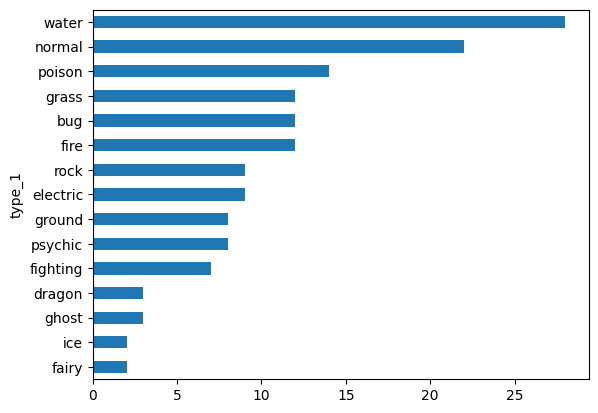

In [ ]:
_ = gen1["type_1"].value_counts().sort_values().plot(kind="barh")

Looks like mostly water pokemon, but our decision to try "normal only" is vindicated - there's a lot to choose from!

Is anyone's *second* type "normal"?

In [23]:
gen1[gen1["type_2"] == "normal"]

,id,pokemon,species_id,height,weight,base_experience,type_1,type_2,hp,attack,...,special_defense,speed,color_1,color_2,color_f,egg_group_1,egg_group_2,url_icon,generation_id,url_image


No, so we can just filter out based on `type_1`

In [24]:
normies = gen1[gen1["type_1"] == "normal"].copy()
normies

,id,pokemon,species_id,height,weight,base_experience,type_1,type_2,hp,attack,...,special_defense,speed,color_1,color_2,color_f,egg_group_1,egg_group_2,url_icon,generation_id,url_image
15,16,pidgey,16,0.3,1.8,50,normal,flying,40,45,...,35,56,#A8A878,#A890F0,#A8A295,flying,NaN,//archives.bulbagarden.net/media/upload/2/26/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
16,17,pidgeotto,17,1.1,30.0,122,normal,flying,63,60,...,50,71,#A8A878,#A890F0,#A8A295,flying,NaN,//archives.bulbagarden.net/media/upload/c/c3/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
17,18,pidgeot,18,1.5,39.5,216,normal,flying,83,80,...,70,101,#A8A878,#A890F0,#A8A295,flying,NaN,//archives.bulbagarden.net/media/upload/e/e3/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
18,19,rattata,19,0.3,3.5,51,normal,NaN,30,56,...,35,72,#A8A878,NaN,NaN,ground,NaN,//archives.bulbagarden.net/media/upload/d/d9/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
19,20,raticate,20,0.7,18.5,145,normal,NaN,55,81,...,70,97,#A8A878,NaN,NaN,ground,NaN,//archives.bulbagarden.net/media/upload/5/57/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
20,21,spearow,21,0.3,2.0,52,normal,flying,40,60,...,31,70,#A8A878,#A890F0,#A8A295,flying,NaN,//archives.bulbagarden.net/media/upload/5/50/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
21,22,fearow,22,1.2,38.0,155,normal,flying,65,90,...,61,100,#A8A878,#A890F0,#A8A295,flying,NaN,//archives.bulbagarden.net/media/upload/0/0b/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
38,39,jigglypuff,39,0.5,5.5,95,normal,fairy,115,45,...,25,20,#A8A878,#EE99AC,#B8A484,fairy,NaN,//archives.bulbagarden.net/media/upload/8/8b/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
39,40,wigglytuff,40,1.0,12.0,196,normal,fairy,140,70,...,50,45,#A8A878,#EE99AC,#B8A484,fairy,NaN,//archives.bulbagarden.net/media/upload/d/d2/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
51,52,meowth,52,0.4,4.2,58,normal,NaN,40,45,...,40,90,#A8A878,NaN,NaN,ground,NaN,//archives.bulbagarden.net/media/upload/0/0d/0...,1.0,https://raw.githubusercontent.com/HybridShivam...


Annoyingly, Clefairy and Clefable were reclassified as "fairy" types so don't show in our Normal filters. Others are unaffected.

In [31]:
normies = gen1[gen1["type_1"].isin(["normal", "fairy"])].copy()
normies

,id,pokemon,species_id,height,weight,base_experience,type_1,type_2,hp,attack,...,special_defense,speed,color_1,color_2,color_f,egg_group_1,egg_group_2,url_icon,generation_id,url_image
15,16,pidgey,16,0.3,1.8,50,normal,flying,40,45,...,35,56,#A8A878,#A890F0,#A8A295,flying,NaN,//archives.bulbagarden.net/media/upload/2/26/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
16,17,pidgeotto,17,1.1,30.0,122,normal,flying,63,60,...,50,71,#A8A878,#A890F0,#A8A295,flying,NaN,//archives.bulbagarden.net/media/upload/c/c3/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
17,18,pidgeot,18,1.5,39.5,216,normal,flying,83,80,...,70,101,#A8A878,#A890F0,#A8A295,flying,NaN,//archives.bulbagarden.net/media/upload/e/e3/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
18,19,rattata,19,0.3,3.5,51,normal,NaN,30,56,...,35,72,#A8A878,NaN,NaN,ground,NaN,//archives.bulbagarden.net/media/upload/d/d9/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
19,20,raticate,20,0.7,18.5,145,normal,NaN,55,81,...,70,97,#A8A878,NaN,NaN,ground,NaN,//archives.bulbagarden.net/media/upload/5/57/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
20,21,spearow,21,0.3,2.0,52,normal,flying,40,60,...,31,70,#A8A878,#A890F0,#A8A295,flying,NaN,//archives.bulbagarden.net/media/upload/5/50/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
21,22,fearow,22,1.2,38.0,155,normal,flying,65,90,...,61,100,#A8A878,#A890F0,#A8A295,flying,NaN,//archives.bulbagarden.net/media/upload/0/0b/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
34,35,clefairy,35,0.6,7.5,113,fairy,NaN,70,45,...,65,35,#EE99AC,NaN,NaN,fairy,NaN,//archives.bulbagarden.net/media/upload/6/67/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
35,36,clefable,36,1.3,40.0,217,fairy,NaN,95,70,...,90,60,#EE99AC,NaN,NaN,fairy,NaN,//archives.bulbagarden.net/media/upload/a/a5/0...,1.0,https://raw.githubusercontent.com/HybridShivam...
38,39,jigglypuff,39,0.5,5.5,95,normal,fairy,115,45,...,25,20,#A8A878,#EE99AC,#B8A484,fairy,NaN,//archives.bulbagarden.net/media/upload/8/8b/0...,1.0,https://raw.githubusercontent.com/HybridShivam...


For the sake of simplicity, we'll allow normal/flying types too.

## Normal and Normal/Flying team

In [32]:
pokemon.columns

Index(['id', 'pokemon', 'species_id', 'height', 'weight', 'base_experience',
       'type_1', 'type_2', 'hp', 'attack', 'defense', 'special_attack',
       'special_defense', 'speed', 'color_1', 'color_2', 'color_f',
       'egg_group_1', 'egg_group_2', 'url_icon', 'generation_id', 'url_image'],
      dtype='object')

In [ ]:
stat_columns = ["hp", "attack", "defense", "special_attack", "special_defense", "speed"]

normie_stats = normies.set_index("pokemon")[stat_columns]

Visualize stats as a heatmap

<Axes: ylabel='pokemon'>

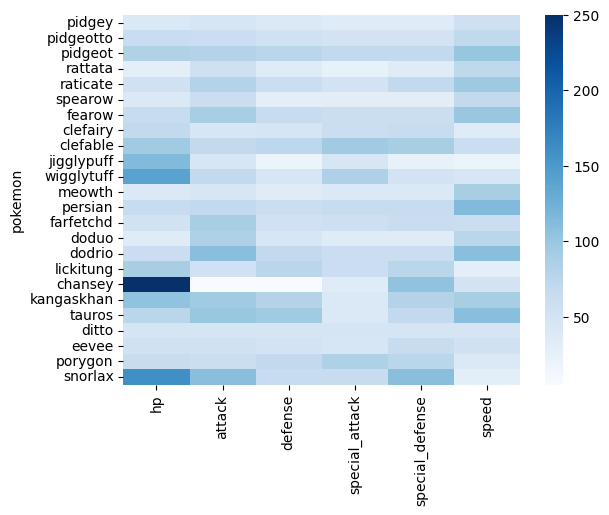

In [ ]:
import seaborn as sns

sns.heatmap(normie_stats, cmap="Blues")

Help pick between Tauros and Kangaskhan

In [ ]:
pokemon.loc[
    pokemon["pokemon"].isin(["tauros", "kangaskhan"]), ["pokemon"] + stat_columns
]

,pokemon,hp,attack,defense,special_attack,special_defense,speed
114,kangaskhan,105,95,80,40,80,90
127,tauros,75,100,95,40,70,110


Help pick flying types

In [ ]:
normies.loc[
    pokemon["pokemon"].isin(["pidgeot", "dodrio", "fearow", "farfetchd"]),
    ["pokemon"] + stat_columns,
]

,pokemon,hp,attack,defense,special_attack,special_defense,speed
17,pidgeot,83,80,75,70,70,101
21,fearow,65,90,65,61,61,100
82,farfetchd,52,90,55,58,62,60
84,dodrio,60,110,70,60,60,110


Help pick attackers

In [43]:
normies[["pokemon"] + stat_columns].sort_values("attack", ascending=False).head(10)

,pokemon,hp,attack,defense,special_attack,special_defense,speed
142,snorlax,160,110,65,65,110,30
84,dodrio,60,110,70,60,60,110
127,tauros,75,100,95,40,70,110
114,kangaskhan,105,95,80,40,80,90
21,fearow,65,90,65,61,61,100
82,farfetchd,52,90,55,58,62,60
83,doduo,35,85,45,35,35,75
19,raticate,55,81,60,50,70,97
17,pidgeot,83,80,75,70,70,101
52,persian,65,70,60,65,65,115


In [ ]:
normies[["pokemon"] + stat_columns].sort_values("special_attack", ascending=False).head(
    10
)

,pokemon,hp,attack,defense,special_attack,special_defense,speed
35,clefable,95,70,73,95,90,60
39,wigglytuff,140,70,45,85,50,45
136,porygon,65,60,70,85,75,40
17,pidgeot,83,80,75,70,70,101
52,persian,65,70,60,65,65,115
142,snorlax,160,110,65,65,110,30
21,fearow,65,90,65,61,61,100
34,clefairy,70,45,48,60,65,35
84,dodrio,60,110,70,60,60,110
107,lickitung,90,55,75,60,75,30


Looks like some pokemon are useful for health/defense and some are better as offensive pokemon.

Let's sprinkle in some domain knowledge to pick a team.

# Final team

1. Snorlax (high HP, attack & special def, can learn lots of TMs)
1. Snorlax (high HP, attack & special def, can learn lots of TMs, can be made different from other snorlax)
1. Tauros (alternative: Kangaskhan)
1. Clefable (tank while others are healed plus good at special attacks, alt: Chansey/Wigglytuff)
1. Dodrio (fast attacker)
1. Either Kangaskhan/another Clefable/Pidgeot

# Intermediate tactics

Initial team (first few gyms):

- Clefairy/Clefable (keep)
- Pidgey/Pidgeotto/Pidgeot (MAYBE replace)
- Rattata/Raticate (replace)
- Spearow/Fearow (replace)
- Spearow -> trade for Farfethd (replace)
- Clefairy/Clefable (replace)

Eventually:

- catch both Snorlax
- catch Tauros
- catch Kangaskhan
- catch Doduo

### Other improvements to analysis

- look at movesets and ability to learn TMs to ensure better coverage of different type moves
- look at variation of stats in the wild (how easy is it to catch better/worse versions of each)